In [1]:
# Week 2 Assignment
# This data consists of traffic collisions in West Los Angeles
# Will help identify high injury networks


In [2]:
# Going to import the data set and download Pa

In [3]:
!pip install pandas

In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
#importing geopandas

In [4]:
df = gpd.read_file('2018_collisions.csv')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [9]:
df['lat']=df['Location'].str.extract(r'\((.*),.*\)')
df['long']=df['Location'].str.extract(r'\(.*,(.*)\)')
df.head()

DR Number Date Reported Date Occurred Time Occurred Area ID Area Name  \
0  190815321    09/09/2019    09/09/2018          1445      08   West LA   
1  180817108    10/01/2018    09/30/2018          2210      08   West LA   
2  190814307    08/17/2018    08/17/2018          1135      08   West LA   
3  180821291    12/27/2018    12/27/2018          1620      08   West LA   
4  180821178    12/25/2018    12/25/2018          1545      08   West LA   

  Reporting District Crime Code Crime Code Description  \
0               0855        997      TRAFFIC COLLISION   
1               0855        997      TRAFFIC COLLISION   
2               0827        997      TRAFFIC COLLISION   
3               0841        997      TRAFFIC COLLISION   
4               0852        997      TRAFFIC COLLISION   

                                       MO Codes  ... Victim Sex  \
0       3008 3025 3035 3037 3102 3401 3701 4027  ...          F   
1       3035 3037 3101 3401 3701 3027 3003 4027  ...          F   
2  3004 3028 3030 3035 3036 3101 3401 3701 4008  ...          M   
3  3004 3028 3030 3035 3036 3104 3401 3701 4008  ...          M   
4       3004 3025 3035 3036 3101 3401 3701 4027  ...          M   

  Victim Descent Premise Code Premise Description  \
0              W          101              STREET   
1              O          101              STREET   
2              W          101              STREET   
3              H          101              STREET   
4              H          101              STREET   

                           Address                     Cross Street  \
0  WESTWOOD                     BL  SANTA MONICA                 BL   
1                         WESTWOOD  MASSACHUSETTS                AV   
2  BEVERLY                      CT  SUNSET                       BL   
3                     SANTA MONICA                          SALTAIR   
4  SANTA MONICA                 BL  WESTGATE                     AV   

               Location geometry      lat        long  
0   (34.0499, -118.437)     None  34.0499    -118.437  
1  (34.0519, -118.4388)     None  34.0519   -118.4388  
2  (34.0638, -118.4703)     None  34.0638   -118.4703  
3  (34.0406, -118.4633)     None  34.0406   -118.4633  
4  (34.0424, -118.4592)     None  34.0424   -118.4592  

[5 rows x 21 columns]

In [21]:
df['lat']=df['lat'].astype(float)
df['long']=df['long'].astype(float)

In [22]:
df.dtypes

DR Number                   object
Date Reported               object
Date Occurred               object
Time Occurred               object
Area ID                     object
Area Name                   object
Reporting District          object
Crime Code                  object
Crime Code Description      object
MO Codes                    object
Victim Age                  object
Victim Sex                  object
Victim Descent              object
Premise Code                object
Premise Description         object
Address                     object
Cross Street                object
Location                    object
geometry                  geometry
lat                        float64
long                       float64
dtype: object

In [ ]:
# shape tells us how many columns and rows are in the dataset

In [23]:
df.info

<bound method DataFrame.info of       DR Number Date Reported Date Occurred Time Occurred Area ID Area Name  \
0     190815321    09/09/2019    09/09/2018          1445      08   West LA   
1     180817108    10/01/2018    09/30/2018          2210      08   West LA   
2     190814307    08/17/2018    08/17/2018          1135      08   West LA   
3     180821291    12/27/2018    12/27/2018          1620      08   West LA   
4     180821178    12/25/2018    12/25/2018          1545      08   West LA   
...         ...           ...           ...           ...     ...       ...   
2737  190804767    01/19/2019    12/21/2018          1530      08   West LA   
2738  190805231    01/29/2019    01/29/2018          1340      08   West LA   
2739  190805973    02/15/2019    11/25/2018          1730      08   West LA   
2740  190804939    01/23/2019    01/23/2018          1155      08   West LA   
2741  190804878    01/22/2019    01/22/2018          1617      08   West LA   

     Reporting Dist

In [24]:
df[['DR Number','Location','Date Reported','Address','Cross Street','Victim Age']]

DR Number              Location Date Reported  \
0     190815321   (34.0499, -118.437)    09/09/2019   
1     180817108  (34.0519, -118.4388)    10/01/2018   
2     190814307  (34.0638, -118.4703)    08/17/2018   
3     180821291  (34.0406, -118.4633)    12/27/2018   
4     180821178  (34.0424, -118.4592)    12/25/2018   
...         ...                   ...           ...   
2737  190804767  (34.0461, -118.5242)    01/19/2019   
2738  190805231  (34.0467, -118.4341)    01/29/2019   
2739  190805973  (34.0473, -118.4519)    02/15/2019   
2740  190804939  (34.0724, -118.4674)    01/23/2019   
2741  190804878  (34.0465, -118.4588)    01/22/2019   

                              Address                     Cross Street  \
0     WESTWOOD                     BL  SANTA MONICA                 BL   
1                            WESTWOOD  MASSACHUSETTS                AV   
2     BEVERLY                      CT  SUNSET                       BL   
3                        SANTA MONICA                          SALTAIR   
4     SANTA MONICA                 BL  WESTGATE                     AV   
...                               ...                              ...   
2737  SUNSET                       BL  MONUMENT                     ST   
2738  LA GRANGE                    AV  WESTWOOD                     BL   
2739  OHIO                         AV  PURDUE                       AV   
2740  SUNSET                       BL  CHURCH                       LN   
2741  SAN VICENTE                  BL  SWEETZER                     ST   

     Victim Age  
0            37  
1            57  
2            28  
3            27  
4            60  
...         ...  
2737         58  
2738             
2739         27  
2740         45  
2741         30  

[2742 rows x 6 columns]

In [25]:
desired_columns = ['DR Number','Date Reported','Address','Cross Street','Victim Age','lat','long']

In [26]:
df2=df[desired_columns]

In [28]:
collisions = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.long, df2.lat), crs="EPSG:4326")
collisions.head()

DR Number Date Reported                          Address  \
0  190815321    09/09/2019  WESTWOOD                     BL   
1  180817108    10/01/2018                         WESTWOOD   
2  190814307    08/17/2018  BEVERLY                      CT   
3  180821291    12/27/2018                     SANTA MONICA   
4  180821178    12/25/2018  SANTA MONICA                 BL   

                      Cross Street Victim Age      lat      long  \
0  SANTA MONICA                 BL         37  34.0499 -118.4370   
1  MASSACHUSETTS                AV         57  34.0519 -118.4388   
2  SUNSET                       BL         28  34.0638 -118.4703   
3                          SALTAIR         27  34.0406 -118.4633   
4  WESTGATE                     AV         60  34.0424 -118.4592   

                      geometry  
0  POINT (-118.43700 34.04990)  
1  POINT (-118.43880 34.05190)  
2  POINT (-118.47030 34.06380)  
3  POINT (-118.46330 34.04060)  
4  POINT (-118.45920 34.04240)

In [16]:
# info gives us the total number of crashes, adressess, victum age, and other info about the datframe

In [29]:
import folium

In [30]:
latitude = collisions.lat.mean()
latitude

34.052312509117435

In [31]:
longitude = collisions.long.mean()
longitude


-118.44322151714078

<Axes: >

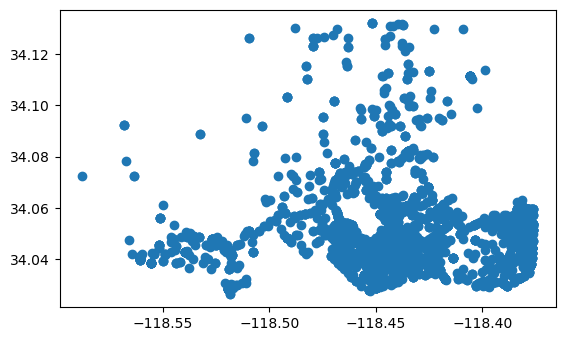

In [33]:
collisions.plot()

In [34]:
collisions = collisions[(collisions['lat'] !=  0) & (collisions['long'] !=0)]
collisions.head()

DR Number Date Reported                          Address  \
0  190815321    09/09/2019  WESTWOOD                     BL   
1  180817108    10/01/2018                         WESTWOOD   
2  190814307    08/17/2018  BEVERLY                      CT   
3  180821291    12/27/2018                     SANTA MONICA   
4  180821178    12/25/2018  SANTA MONICA                 BL   

                      Cross Street Victim Age      lat      long  \
0  SANTA MONICA                 BL         37  34.0499 -118.4370   
1  MASSACHUSETTS                AV         57  34.0519 -118.4388   
2  SUNSET                       BL         28  34.0638 -118.4703   
3                          SALTAIR         27  34.0406 -118.4633   
4  WESTGATE                     AV         60  34.0424 -118.4592   

                      geometry  
0  POINT (-118.43700 34.04990)  
1  POINT (-118.43880 34.05190)  
2  POINT (-118.47030 34.06380)  
3  POINT (-118.46330 34.04060)  
4  POINT (-118.45920 34.04240)

In [35]:
m = folium.Map(location=[34.02082931565746534.052312509117435
,-118.33262604801148], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=collisions, # geo data
                  data=collisions, # data          
                  key_on='feature.properties.geometry', # key, or merge column
                  columns=['geometry'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Age of collisions').add_to(m)    # name on the legend color bar
m

IndexError: list index out of range

In [65]:
m = folium.Map(location=(34.0544, -118.4656))
m

In [81]:
m = folium.Map(location=[34.020829315657465,-118.33262604801148], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')
folium.GeoJson(collisions).add_to(m)
m

In [20]:
df.head(20)

DR Number Date Reported Date Occurred Time Occurred Area ID Area Name  \
0   190815321    09/09/2019    09/09/2018          1445      08   West LA   
1   170812037    06/26/2017    06/25/2017          1530      08   West LA   
2   170813547    07/28/2017    07/28/2017          1500      08   West LA   
3   170818830    11/21/2017    11/21/2017          1130      08   West LA   
4   180817108    10/01/2018    09/30/2018          2210      08   West LA   
5   190814307    08/17/2018    08/17/2018          1135      08   West LA   
6   180821291    12/27/2018    12/27/2018          1620      08   West LA   
7   180821178    12/25/2018    12/25/2018          1545      08   West LA   
8   170814090    08/11/2017    08/11/2017          0320      08   West LA   
9   170818105    11/08/2017    11/08/2017          1540      08   West LA   
10  170818565    11/18/2017    11/17/2017          2130      08   West LA   
11  180811836    06/15/2018    06/15/2018          1300      08   West LA   
12  190804496    10/15/2018    10/15/2018          1345      08   West LA   
13  190816518    10/04/2019    10/04/2015          1205      08   West LA   
14  140804223    01/08/2014    01/07/2014          1825      08   West LA   
15  170811964    06/24/2017    06/24/2017          1530      08   West LA   
16  140805237    02/03/2014    02/02/2014          2110      08   West LA   
17  180807016    03/07/2018    03/07/2018          1240      08   West LA   
18  190818015    11/07/2019    11/06/2018          1655      08   West LA   
19  160812388    07/01/2016    07/01/2016          0740      08   West LA   

   Reporting District Crime Code Crime Code Description  \
0                0855        997      TRAFFIC COLLISION   
1                0893        997      TRAFFIC COLLISION   
2                0832        997      TRAFFIC COLLISION   
3                0841        997      TRAFFIC COLLISION   
4                0855        997      TRAFFIC COLLISION   
5                0827        997      TRAFFIC COLLISION   
6                0841        997      TRAFFIC COLLISION   
7                0852        997      TRAFFIC COLLISION   
8                0836        997      TRAFFIC COLLISION   
9                0883        997      TRAFFIC COLLISION   
10               0819        997      TRAFFIC COLLISION   
11               0857        997      TRAFFIC COLLISION   
12               0853        997      TRAFFIC COLLISION   
13               0882        997      TRAFFIC COLLISION   
14               0819        997      TRAFFIC COLLISION   
15               0884        997      TRAFFIC COLLISION   
16               0841        997      TRAFFIC COLLISION   
17               0835        997      TRAFFIC COLLISION   
18               0847        997      TRAFFIC COLLISION   
19               0826        997      TRAFFIC COLLISION   

                                        MO Codes Victim Age Victim Sex  \
0        3008 3025 3035 3037 3102 3401 3701 4027         37          F   
1   3004 3028 3030 3035 3036 3101 3401 3701 4008         56          M   
2   3701 3004 3028 3030 3035 3037 3101 3401 4008         48          M   
3   3004 3028 3030 3035 3037 3101 3401 3701 4020         47          F   
4        3035 3037 3101 3401 3701 3027 3003 4027         57          F   
5   3004 3028 3030 3035 3036 3101 3401 3701 4008         28          M   
6   3004 3028 3030 3035 3036 3104 3401 3701 4008         27          M   
7        3004 3025 3035 3036 3101 3401 3701 4027         60          M   
8   3003 3026 3029 3035 3036 3101 3401 3701 4008         16          F   
9                                                        63          F   
10       3011 3028 3030 3034 3401 3701 4027 3101         16              
11  3008 3026 3029 3035 3036 3101 3401 3701 4027         26          M   
12  3004 3026 3029 3035 3036 3104 3401 3701 4008                         
13  3004 3028 3030 3035 3037 3101 3401 3701 4008         36          F   
14                                  

In [21]:
# shows us the first 15 rows

In [22]:
type('Location')


str

In [23]:
df.tail(1)

DR Number Date Reported Date Occurred Time Occurred Area ID Area Name  \
13954  190804878    01/22/2019    01/22/2018          1617      08   West LA   

      Reporting District Crime Code Crime Code Description  \
13954               0842        997      TRAFFIC COLLISION   

                                      MO Codes Victim Age Victim Sex  \
13954  3011 3028 3034 3037 3101 3401 3701 4008         30              

      Victim Descent Premise Code Premise Description  \
13954                         101              STREET   

                               Address                     Cross Street  \
13954  SAN VICENTE                  BL  SWEETZER                     ST   

                   Location geometry  
13954  (34.0465, -118.4588)     None

In [24]:
# tail shows the last row in df

In [25]:
df.sample(4)

DR Number Date Reported Date Occurred Time Occurred Area ID Area Name  \
7941   160819139    11/27/2016    11/17/2016          2225      08   West LA   
7818   160814033    08/05/2016    08/05/2016          0730      08   West LA   
10354  170819752    12/14/2017    12/14/2017          1830      08   West LA   
10256  170817365    10/23/2017    10/23/2017          0815      08   West LA   

      Reporting District Crime Code Crime Code Description  \
7941                0849        997      TRAFFIC COLLISION   
7818                0886        997      TRAFFIC COLLISION   
10354               0884        997      TRAFFIC COLLISION   
10256               0831        997      TRAFFIC COLLISION   

                                           MO Codes Victim Age Victim Sex  \
7941        3006 3025 3034 3037 3101 3401 3701 4008         42          F   
7818   3011 3028 3034 3037 3102 3401 3701 4027 3002         99          M   
10354  3006 3028 3030 3035 3037 3101 3401 3701 4027         57          F   
10256  3004 3026 3029 3035 3037 3101 3401 3701 4008         49          F   

      Victim Descent Premise Code Premise Description  \
7941               O          101              STREET   
7818               O          108         PARKING LOT   
10354              O          101              STREET   
10256              W          101              STREET   

                               Address                     Cross Street  \
7941   LA CIENEGA                   BL  WHITWORTH                    AV   
7818                              PICO                          ROXBURY   
10354  VETERAN                      AV  PICO                         BL   
10256  GRETNA GREEN                 WY  SAN VICENTE                  BL   

                   Location geometry  
7941   (34.0571, -118.3762)     None  
7818   (34.0537, -118.4031)     None  
10354  (34.0389, -118.4311)     None  
10256   (34.0514, -118.476)     None

In [26]:
# gives us randam sample of 4

In [27]:
df.dtypes

DR Number                   object
Date Reported               object
Date Occurred               object
Time Occurred               object
Area ID                     object
Area Name                   object
Reporting District          object
Crime Code                  object
Crime Code Description      object
MO Codes                    object
Victim Age                  object
Victim Sex                  object
Victim Descent              object
Premise Code                object
Premise Description         object
Address                     object
Cross Street                object
Location                    object
geometry                  geometry
dtype: object

In [28]:
df.columns.to_list()

['DR Number',
 'Date Reported',
 'Date Occurred',
 'Time Occurred',
 'Area ID',
 'Area Name',
 'Reporting District',
 'Crime Code',
 'Crime Code Description',
 'MO Codes',
 'Victim Age',
 'Victim Sex',
 'Victim Descent',
 'Premise Code',
 'Premise Description',
 'Address',
 'Cross Street',
 'Location',
 'geometry']

In [29]:
df['Location'].sample(5)

5414     (34.0439, -118.4462)
4515     (34.0313, -118.3921)
10361    (34.0612, -118.4183)
12242    (34.0294, -118.4502)
3350     (34.0504, -118.4467)
Name: Location, dtype: object

In [30]:
#sample with 5 random cordinates

In [31]:
df['Location'].value_counts()

Location
(34.0401, -118.5606)    111
(34.043, -118.5398)     107
(34.0382, -118.4412)    103
(34.0578, -118.4478)     96
(34.0465, -118.4484)     75
                       ... 
(34.053, -118.4818)       1
(34.0469, -118.5242)      1
(34.0489, -118.536)       1
(34.0508, -118.4683)      1
(34.0565, -118.4291)      1
Name: count, Length: 2196, dtype: int64

In [32]:
#Location values, looks like it shows the top five locations and lowest as well

In [33]:
location_count = df['Location'].value_counts()
location_count

Location
(34.0401, -118.5606)    111
(34.043, -118.5398)     107
(34.0382, -118.4412)    103
(34.0578, -118.4478)     96
(34.0465, -118.4484)     75
                       ... 
(34.053, -118.4818)       1
(34.0469, -118.5242)      1
(34.0489, -118.536)       1
(34.0508, -118.4683)      1
(34.0565, -118.4291)      1
Name: count, Length: 2196, dtype: int64

In [34]:
type(location_count)

pandas.core.series.Series

In [35]:
location_count =location_count.reset_index()
location_count

Location  count
0     (34.0401, -118.5606)    111
1      (34.043, -118.5398)    107
2     (34.0382, -118.4412)    103
3     (34.0578, -118.4478)     96
4     (34.0465, -118.4484)     75
...                    ...    ...
2191   (34.053, -118.4818)      1
2192  (34.0469, -118.5242)      1
2193   (34.0489, -118.536)      1
2194  (34.0508, -118.4683)      1
2195  (34.0565, -118.4291)      1

[2196 rows x 2 columns]

In [36]:
#changes the way rows are labeled 

In [37]:
type(location_count)

pandas.core.frame.DataFrame

In [38]:
location_count.columns.to_list()

['Location', 'count']

In [39]:
location_count.columns = ['location' , 'count']
location_count

location  count
0     (34.0401, -118.5606)    111
1      (34.043, -118.5398)    107
2     (34.0382, -118.4412)    103
3     (34.0578, -118.4478)     96
4     (34.0465, -118.4484)     75
...                    ...    ...
2191   (34.053, -118.4818)      1
2192  (34.0469, -118.5242)      1
2193   (34.0489, -118.536)      1
2194  (34.0508, -118.4683)      1
2195  (34.0565, -118.4291)      1

[2196 rows x 2 columns]

<Axes: >

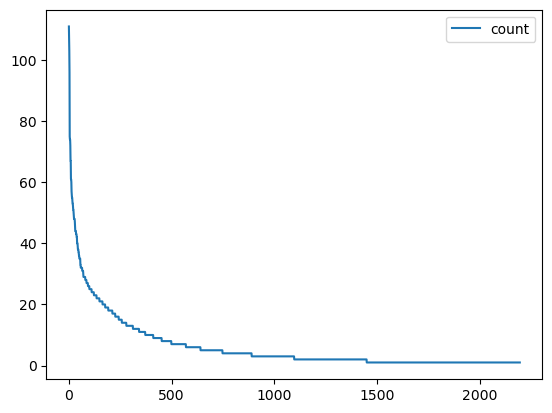

In [40]:
location_count.plot()

<Axes: title={'center': 'Number collsions by location'}, xlabel='location'>

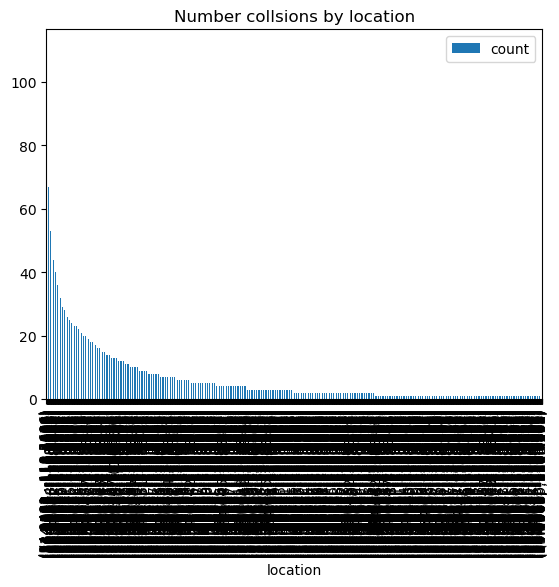

In [41]:
location_count.plot.bar(x = 'location', y = 'count', title = 'Number collsions by location')

In [42]:
# This one looks crazy, way to much data. Idk bruh

In [43]:

df_trimmed.Location

NameError: name 'df_trimmed' is not defined

In [ ]:
# Data needs cleaning so the plot makes no sense lol. Was trying to figure out how to omit variable, was getting pretty close but gave up :/

In [ ]:
desired_columns = ['Victim Age']

In [ ]:
df_trimmed = df [desired_columns].copy()
df_trimmed

In [ ]:
#singled out the collsion party's age 

In [ ]:
age = df['Victim Age'].value_counts()
age

In [ ]:
df_trimmed.plot()

In [ ]:
# Still looks insane haha
